In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
# TChem_install = '/Users/odiazib/csp_clang_bld_develop/csp/install/release'
# sys.path.append(TChem_install+'/example/runs/scripts/')

TChem_install = '/work/westgroup/ChrisB/tchem_system/install/csplib'
sys.path.append(TChem_install+'/example/runs/scripts/')
from CSPindexHelper import *
import os
os.getcwd() 
import matplotlib.backends.backend_pdf

In [2]:
outDir = '/work/westgroup/ChrisB/meOH-synthesis_cantera/meOH-synthesis/cantera_simulations/RMG_wDeut/2021_5_5_1342_199260_fixed_typo_in_Cu111_library_for_a5_nasa_parameter/IdealGasReactor/energy_off/sensitivity_off/400/csp/CSP_Spinning_basket_area_0.0231_energy_off_temp_400_h2_0_5_COCO2_0_1.dat'
data = np.genfromtxt(outDir, dtype=str)
Header = (data[0,:]).tolist()
solTchem = (data[1:,:]).astype(np.float)
print(np.shape(solTchem))

(200, 35)


/shared/centos7/anaconda3/2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/shared/centos7/anaconda3/2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  This is separate from the ipykernel package so we can avoid doing imports until
/shared/centos7/anaconda3/2019.10/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: More than 20 figures 

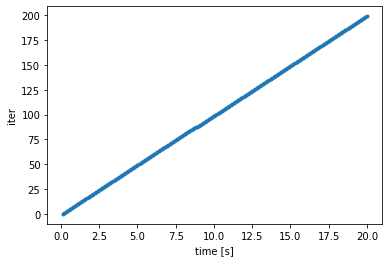

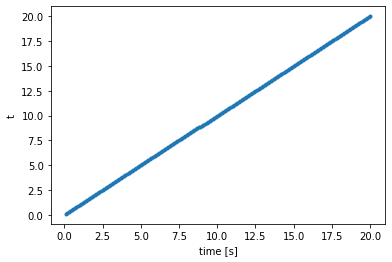

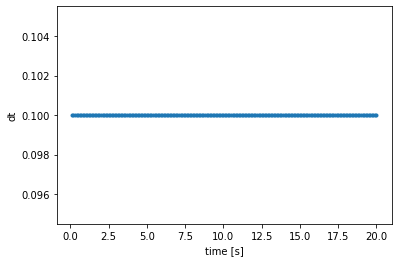

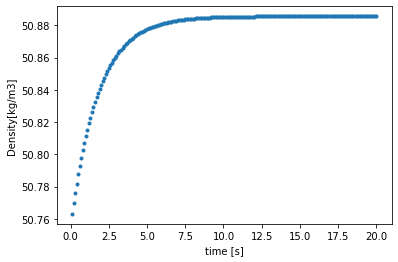

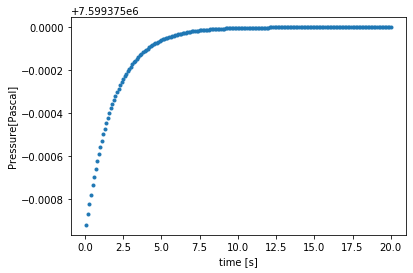

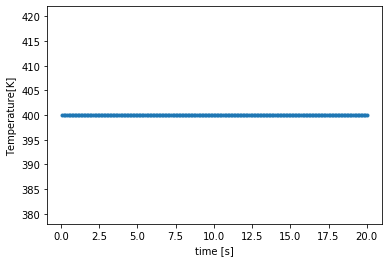

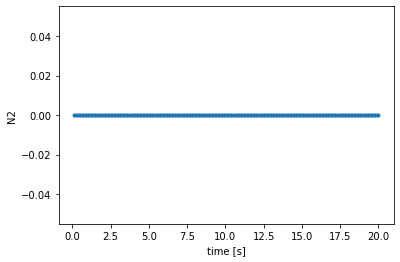

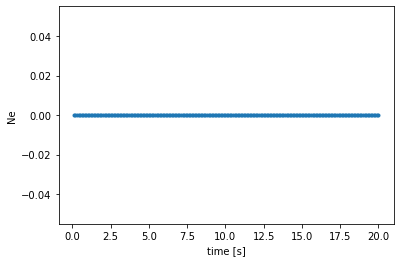

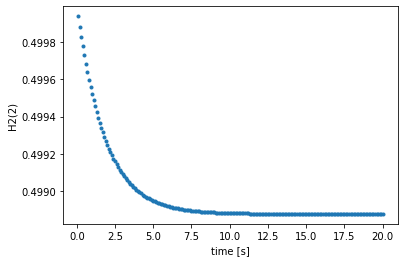

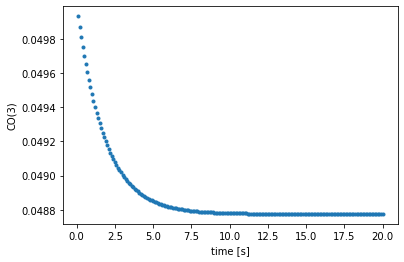

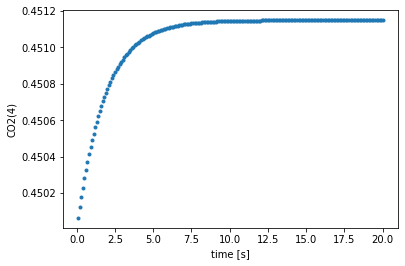

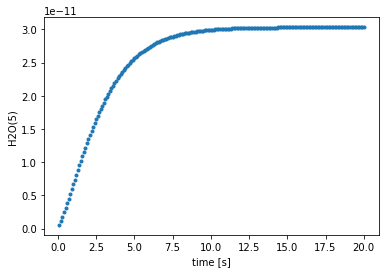

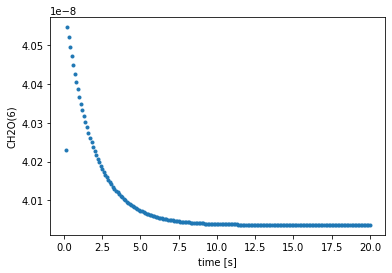

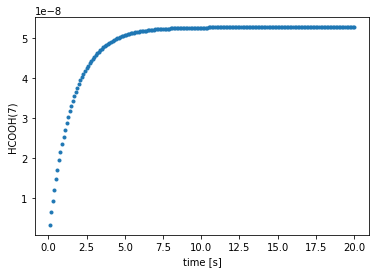

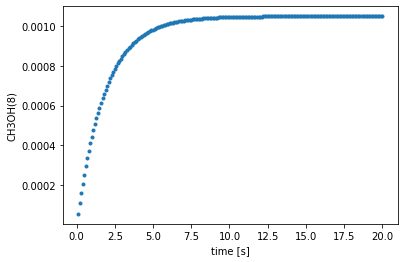

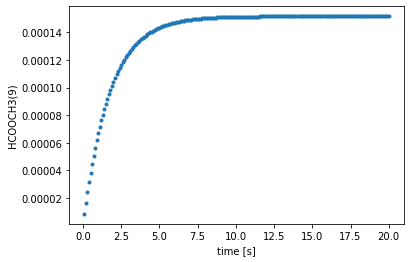

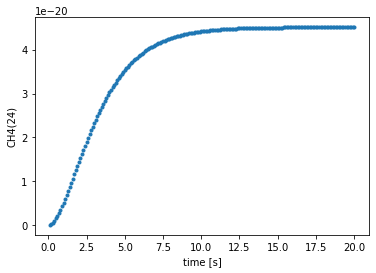

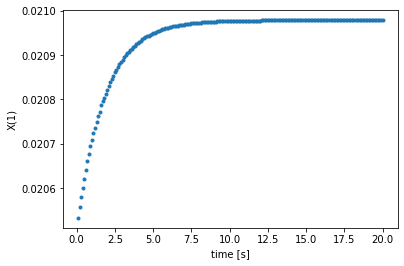

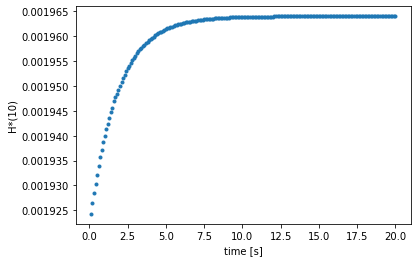

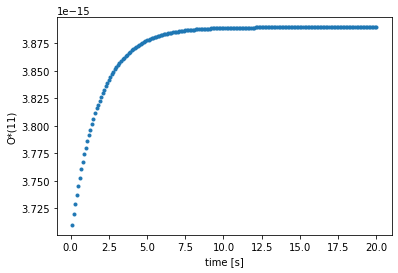

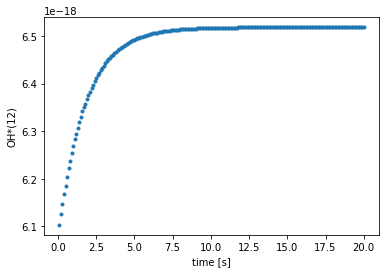

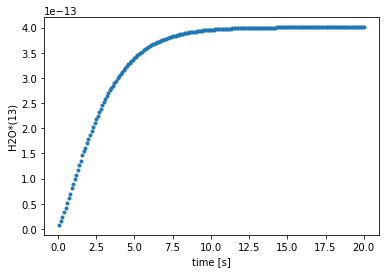

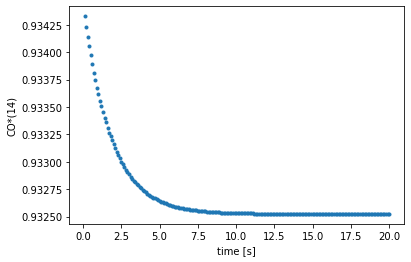

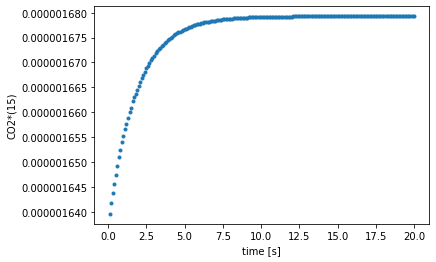

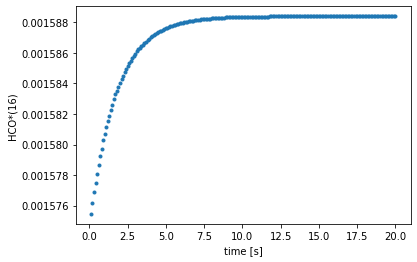

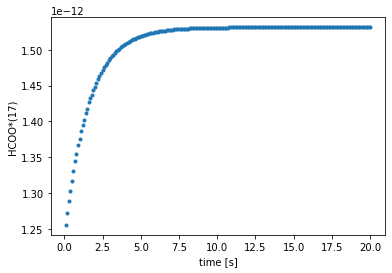

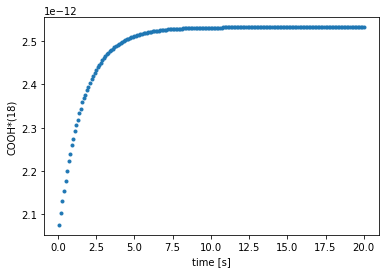

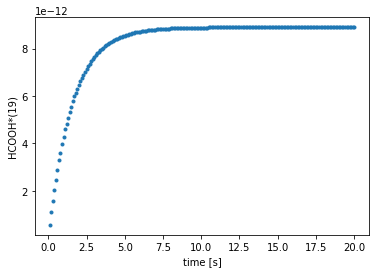

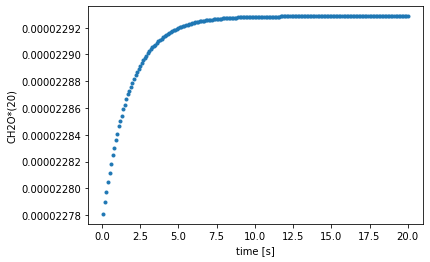

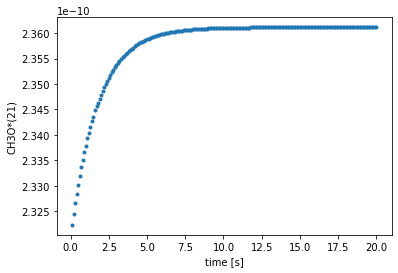

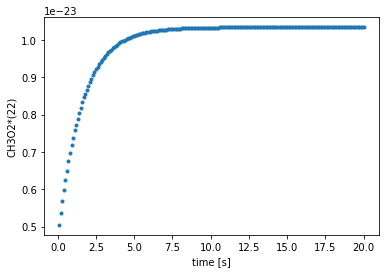

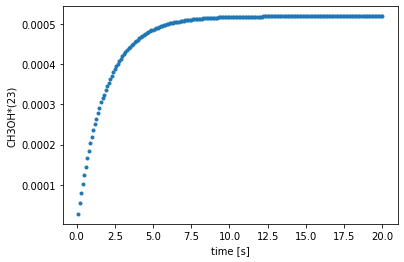

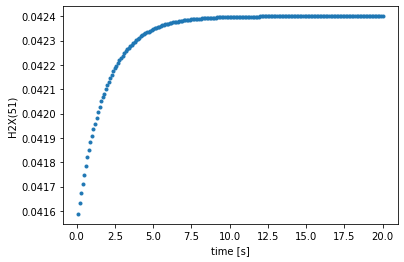

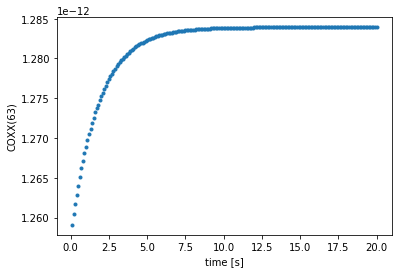

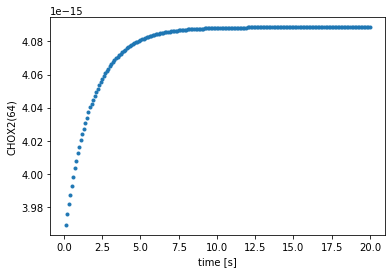

In [3]:
pdf = matplotlib.backends.backend_pdf.PdfPages("output.pdf")
for var in Header:
    plt.figure()
    plt.plot(solTchem[:, Header.index('t')], solTchem[:, Header.index(var),],'.')
    plt.xlabel('time [s]')
    plt.ylabel(var)
    pdf.savefig(bbox_inches='tight')
pdf.close()    

In [5]:
outDir ='/work/westgroup/ChrisB/meOH-synthesis_cantera/meOH-synthesis/cantera_simulations/tchem/'
firstname =''
m = np.loadtxt(outDir + firstname +'_m.dat')
# mold = np.loadtxt(outDir + firstname +'_mold.dat')

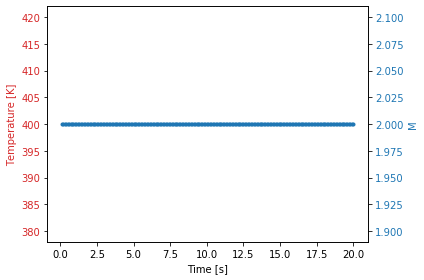

In [6]:
fig, ax1 = plt.subplots()#figsize=(8,4)

color = 'tab:red'
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Temperature [K]', color=color)
ax1.plot(solTchem[:,1], solTchem[:,5], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('M',color=color)  # we already handled the x-label with ax1
ax2.plot(solTchem[:,1], m,'.',  color=color)
# ax2.plot(solTchem[:,1], mold,'gs')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('M.pdf')

In [7]:
tau = np.loadtxt(outDir + firstname +'_tau.dat')
Nvar = len(tau[0,:])
tmp = []
for i,M in enumerate(m):
    if (M == Nvar ):
        tmp += [tau[i,int(M-1)]]     
    else:
        tmp += [tau[i,int(M)]] 

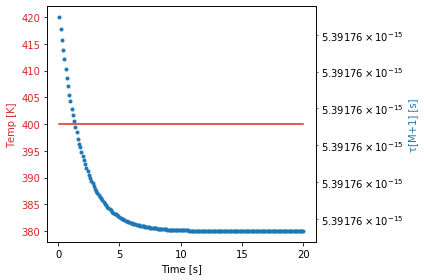

In [8]:
fig, ax1 = plt.subplots()#figsize=(8,4)

color = 'tab:red'
ax1.set_xlabel('Time [s]')
ax1.set_ylabel('Temp [K]', color=color)
ax1.plot(solTchem[:,1], solTchem[:,5], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('τ[M+1] [s]',color=color)  # we already handled the x-label with ax1
ax2.plot(solTchem[:,1], tmp,'.',  color=color)
ax2.tick_params(axis='y', labelcolor=color)
ax2.set_yscale('log')
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('tauMp.pdf')

In [9]:
rank_jac= np.loadtxt(firstname +'_jac_numerical_rank.dat')

In [10]:
tmrank = []
for i,M in enumerate(m):
    if rank_jac[i] == Nvar:
        tmrank += [tau[i,Nvar-1]]
    else:    
        tmrank += [tau[i,int(rank_jac[i])]]

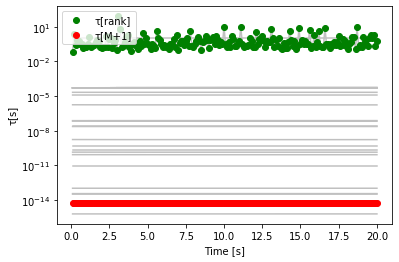

In [11]:
plt.figure()

for i in range(len(tau[0,:])):
    plt.plot(solTchem[:,1],tau[:,i],'silver')
plt.plot(solTchem[:,1],tmrank,'go', label='τ[rank]')  
plt.plot(solTchem[:,1],tmp,'ro', label='τ[M+1]')    
plt.xlabel('Time [s]')
plt.ylabel('τ[s]')
plt.yscale('log')
plt.legend(loc='best')
# plt.xlim([0,300])
# plt.ylim([1e-17,1e3])
plt.savefig('timeScales.pdf')

In [12]:
Rnames = np.loadtxt('kmod.reactions',dtype=np.str,delimiter=",")

rfwdL = []
rrevL = []
ElementPositionFwd = []
ElementPositionRev = []
for i, Reac in enumerate(Rnames):
    if ('<=>' in Reac[0]):
        simb = '<=>'
    elif ('=>' in Reac[0]):
        simb = '=>'
    elif ('<=' in Reac[0]):
        simb = '<='
    elif ('=' in Reac[0]):
        simb = '='
    else:
        print('something is wrong')
        
    out = np.char.split(Reac,simb)[0]

    rfwd = out[0] + '=>' + out[1]
    rrev = out[0] + '<=' + out[1]
    rfwdL += [rfwd]
    rrevL += [rrev]
    ElementPositionFwd +=[i + 1]
    ElementPositionRev +=[-(i+1)]
    
    
logNamesReactions =  rfwdL +  rrevL      
NgasReac = 2*len(Rnames)
ElementPosition = ElementPositionFwd + ElementPositionRev

In [13]:
RnamesSurf = np.loadtxt('kmodSurf.reactions',dtype=np.str,delimiter=",")
rfwdLSurf = []
rrevLSurf = []
ElementPositionSFwd = []
ElementPositionSRev = []
for i,Reac in enumerate(RnamesSurf):
    if ('<=>' in Reac[0]):
        simb = '<=>'
    elif ('=>' in Reac[0]):
        simb = '=>'
    elif ('<=' in Reac[0]):
        simb = '<='
    elif ('=' in Reac[0]):
        simb = '='
    else:
        print('something is wrong')
        
    out = np.char.split(Reac,simb)[0]

    rfwd = out[0] + '=>' + out[1]
    rrev = out[0] + '<=' + out[1]
    rfwdLSurf += [rfwd]
    rrevLSurf += [rrev]
    ElementPositionSFwd +=[i+1]
    ElementPositionSRev +=[-(i+1)]
    
logNamesReactions +=  rfwdLSurf +  rrevLSurf    
NSurfReac = 2*len(RnamesSurf)
ElementPosition += ElementPositionSFwd + ElementPositionSRev

In [14]:
logNamesReactions += ['cstr_conv']

In [15]:
NtotalReactions= len(logNamesReactions)

In [16]:
print('Total Number of reactions',NtotalReactions)

Total Number of reactions 285


In [17]:
print(NSurfReac/2.)

135.0


In [18]:
NtimeStep, Ndime = np.shape(solTchem)
species_names = np.loadtxt(firstname+'speciesNames.dat',dtype='str')
ngasSpec = len(species_names)
nameRHS = ['Temperature[K]']
for i in range(len(species_names)):
    nameRHS += [species_names[i]]

In [19]:
def makePlotIndices( t, var, indices, ind_list, namesReactions,\
                   xlabel_1, ylabel_1, ylabel_2, \
                   legend_loc_x, legend_loc_y):
    
    fig, ax1 = plt.subplots()
    color = 'k'
    ax1.set_xlabel(xlabel_1)
    ax1.set_ylabel(ylabel_1, color=color)
    ax1.plot(t,var,'--.', color=color)
    
    ax1.tick_params(axis='y', labelcolor=color)
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel(ylabel_2,color=color)
    
    for i in ind_list:
        ax2.plot(t,\
                 indices[:,i],'-',label=namesReactions[i])
    ax2.legend(loc='best', \
               bbox_to_anchor=(legend_loc_x,legend_loc_y) )
    ax2.tick_params(axis='y', labelcolor=color)
    return 

In [20]:
Slowind = np.loadtxt(firstname +'_SlowImportanceIndex.dat')

In [21]:
St = np.reshape(Slowind,[NtimeStep, Nvar, NtotalReactions])

No handles with labels found to put in legend.


ValueError: 'CH4(41)' is not in list

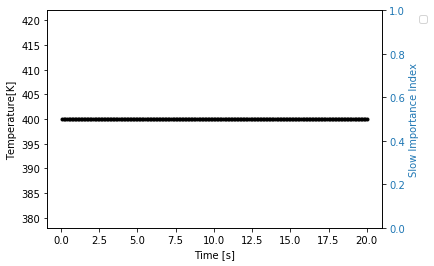

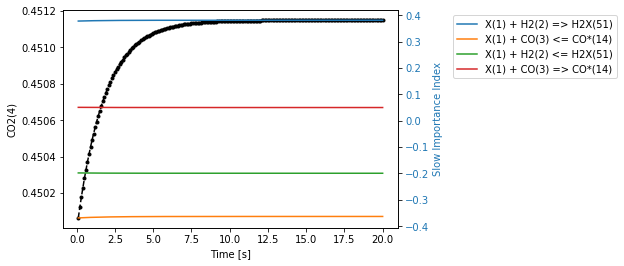

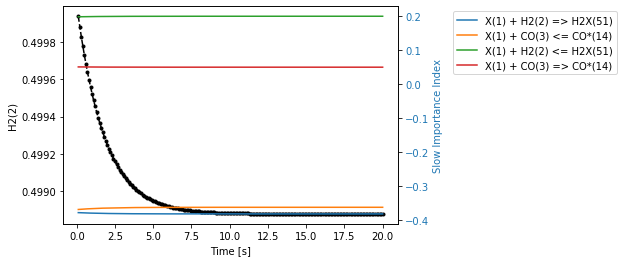

In [22]:
variables = ['Temperature[K]','CO2(4)', 'H2(2)','CH4(41)','CH3OH(8)','H2O(5)']

for VarName in variables:
    IndVar = nameRHS.index(VarName)
    MaxPInd, IndxList = getTopIndex(St, IndVar,Top=4)
    
    makePlotIndices(solTchem[:,Header.index('t')], solTchem[:,Header.index(VarName)],\
                St[:,IndVar,:], IndxList, logNamesReactions,\
                xlabel_1='Time [s]', ylabel_1=VarName, ylabel_2='Slow Importance Index', \
                legend_loc_x=1.15, legend_loc_y=1)
    plt.savefig(VarName+'_SlowIndex.pdf', bbox_inches='tight')

In [23]:
Fastind = np.loadtxt(firstname +'_FastImportanceIndex.dat')
Ft = np.reshape(Fastind,[NtimeStep,Nvar,NtotalReactions])

No handles with labels found to put in legend.


ValueError: 'CH4(41)' is not in list

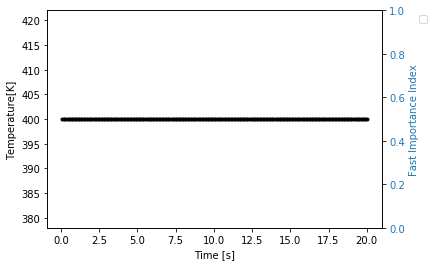

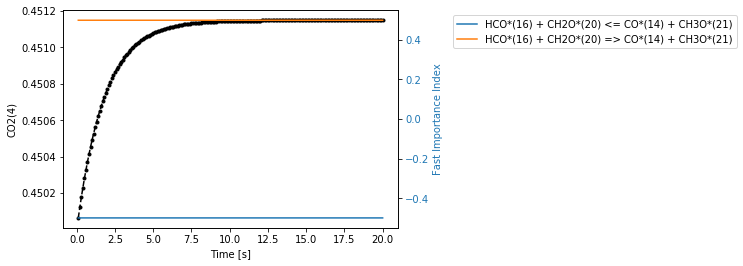

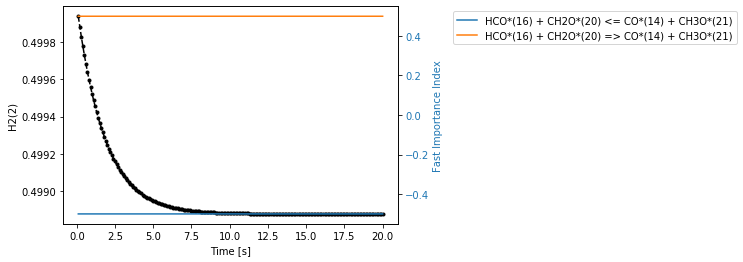

In [24]:
for VarName in variables:
    IndVar = nameRHS.index(VarName)
    MaxPInd, IndxList = getTopIndex(Ft, IndVar,Top=3)    
    makePlotIndices(solTchem[:,Header.index('t')], solTchem[:,Header.index(VarName)],\
                Ft[:,IndVar,:], IndxList, logNamesReactions,\
                xlabel_1='Time [s]', ylabel_1=VarName, ylabel_2='Fast Importance Index', \
                legend_loc_x=1.15, legend_loc_y=1)
    plt.savefig(VarName+'_FastIndex.pdf', bbox_inches='tight')

In [25]:
PIind = np.loadtxt(firstname +'_ParticipationIndex.dat')
# PIind = np.loadtxt(firstname +'_P_ik.dat')
Pt = np.reshape(PIind,[NtimeStep,Nvar,NtotalReactions])

In [26]:
f = np.loadtxt(outDir + firstname +'_f.dat')

Mode 0
224 -76 HCO*(16) + CH2O*(20) <= CO*(14) + CH3O*(21)
89 76 HCO*(16) + CH2O*(20) => CO*(14) + CH3O*(21)
Mode 1
135 122 X(1) + HCO*(16) => CHOX2(64)
270 -122 X(1) + HCO*(16) <= CHOX2(64)
Mode 2


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Mode 3
Mode 4
Mode 5
Mode 6


No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.
No handles with labels found to put in legend.


Mode 7
Mode 8
Mode 9


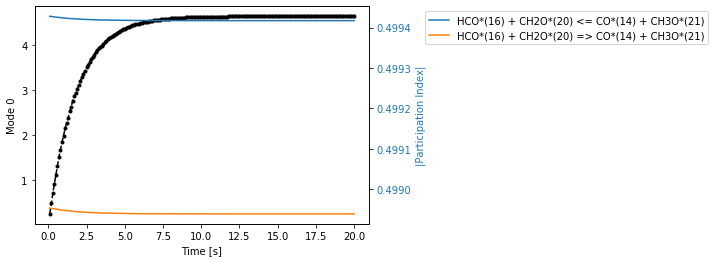

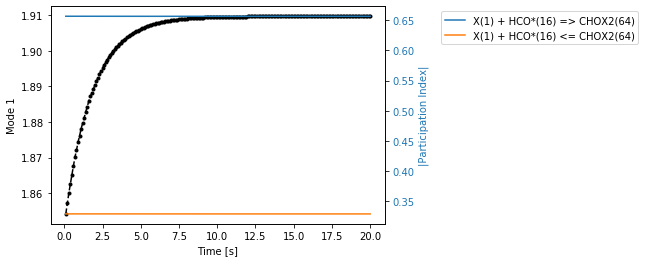

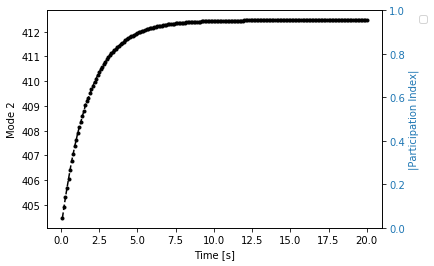

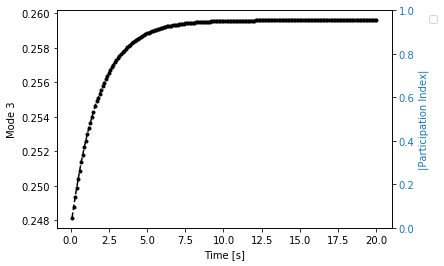

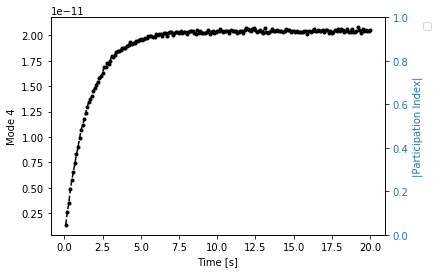

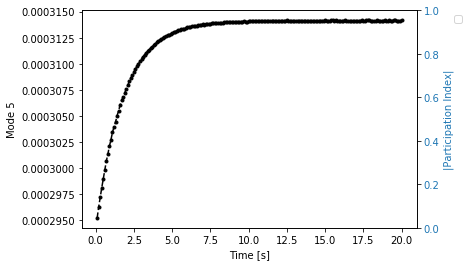

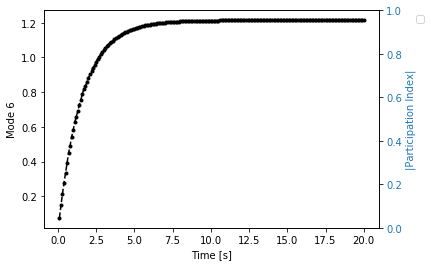

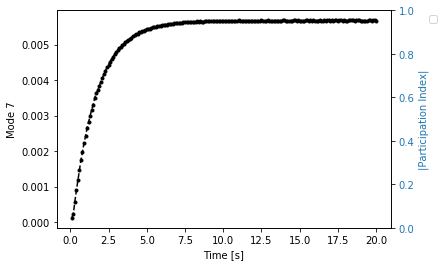

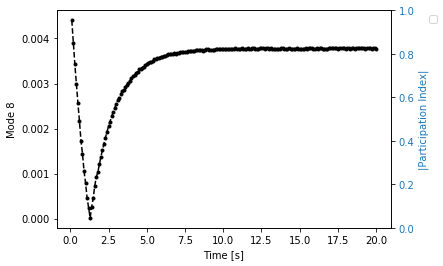

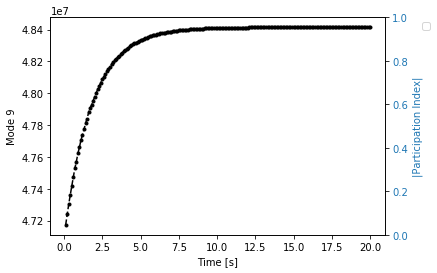

In [27]:
for ModN in range(10):
    VarName = 'Mode '+str(ModN)
    IndxList = getPartTopIndex(Pt, ModN, m, Top=3, threshold=1e-2)
    print(VarName)
    for ind in IndxList:
        print (ind,ElementPosition[ind],logNamesReactions[ind])
    makePlotIndices(solTchem[:,Header.index('t')], abs(f[:,ModN]),\
                abs(Pt[:,ModN,:]), IndxList, logNamesReactions,\
                xlabel_1='Time [s]', ylabel_1=VarName, ylabel_2='|Participation Index|', \
                legend_loc_x=1.15, legend_loc_y=1)

In [28]:
Pointers = np.loadtxt(firstname +'_cspPointers.dat')
# Pointers = np.loadtxt(firstname +'_cspp_ij.dat')
Ptrs = np.reshape(Pointers,[NtimeStep,Nvar,Nvar])

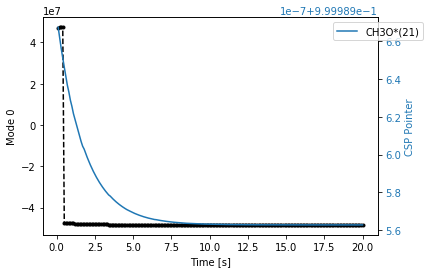

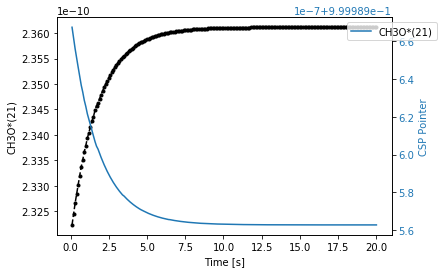

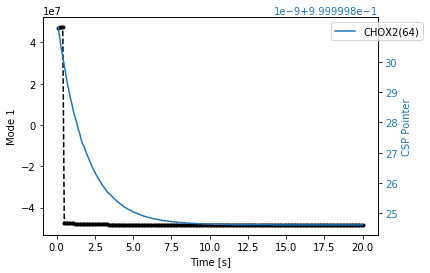

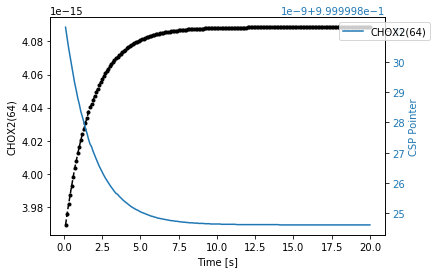

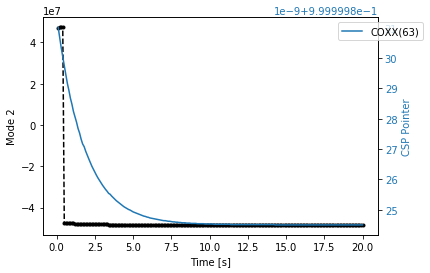

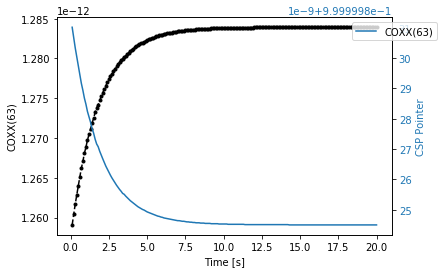

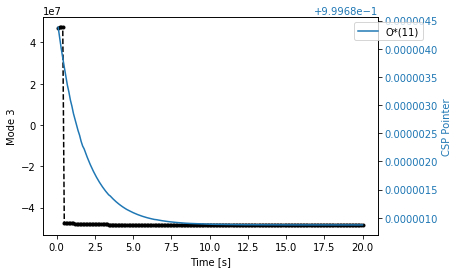

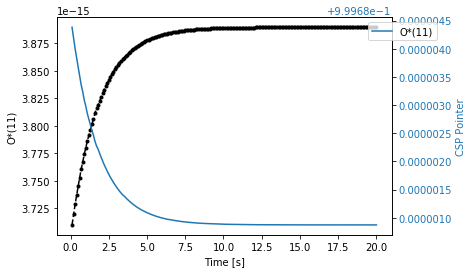

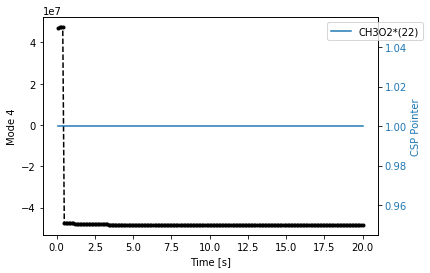

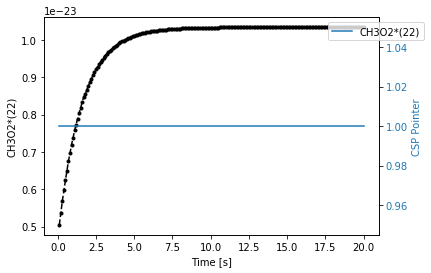

In [29]:
for IndVar in range(5):
    MaxPInd, IndxList = getTopIndex(Ptrs, IndVar, Top=2, threshold=1e-3)   
    makePlotIndices(solTchem[:,Header.index('t')], f[:,ModN],\
                Ptrs[:,IndVar,:], IndxList, nameRHS,\
                xlabel_1='Time [s]', ylabel_1='Mode '+str(IndVar), ylabel_2='CSP Pointer', \
                legend_loc_x=1.15, legend_loc_y=1)
# plt.savefig('Mode'+str(IndVar)+'_CSPPointer.pdf', bbox_inches='tight')
    VarName = nameRHS[IndxList[0]]
    makePlotIndices(solTchem[:,Header.index('t')], solTchem[:,Header.index(VarName)],\
                Ptrs[:,IndVar,:], IndxList, nameRHS,\
                xlabel_1='Time [s]', ylabel_1=VarName, ylabel_2='CSP Pointer', \
                legend_loc_x=1.15, legend_loc_y=1)